# Guided Project #13 - Finding the Best Markets to Advertise In
By [Luis Munguia](http://www.linkedin.com/in/luis-munguia) and [Dataquest](http://www.dataquest.io)

In this guided project, I'll perform practical data analysis such as:

* Determine the statistical properties of distributions.
* How the mean, median and mode relate to each other.
* Measure the variability of a distribution using the range, the mean absolute deviation, the variance and standard deviation.
* Locate any value in a distribution using z-scores.

The dataset is from a fictional e-learning company that offers courses on programming and other domains. Most of the courses are on **web and mobile development.** The goal is to find out the two best markets to advertise it's products as they would like to promote them and invest in adversisement.

Organizing surveys for a different markets could be very costly, so it's a better to explore cheaper or free options. One such option comes from "freeCodeCamp": they made a new coder survey in the year 2017. 

The data is publicly available in this GitHub [repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

## 1.- Library and Jupyter setup.
Import `pandas` and do exploratory data analysis.

In [1]:
import pandas as pd

# Use low_memory as it seems that the csv file is quite large.
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
survey.shape

(18175, 136)

In [2]:
survey.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
for i in survey.columns:
    print(i)

Age
AttendedBootcamp
BootcampFinish
BootcampLoanYesNo
BootcampName
BootcampRecommend
ChildrenNumber
CityPopulation
CodeEventConferences
CodeEventDjangoGirls
CodeEventFCC
CodeEventGameJam
CodeEventGirlDev
CodeEventHackathons
CodeEventMeetup
CodeEventNodeSchool
CodeEventNone
CodeEventOther
CodeEventRailsBridge
CodeEventRailsGirls
CodeEventStartUpWknd
CodeEventWkdBootcamps
CodeEventWomenCode
CodeEventWorkshops
CommuteTime
CountryCitizen
CountryLive
EmploymentField
EmploymentFieldOther
EmploymentStatus
EmploymentStatusOther
ExpectedEarning
FinanciallySupporting
FirstDevJob
Gender
GenderOther
HasChildren
HasDebt
HasFinancialDependents
HasHighSpdInternet
HasHomeMortgage
HasServedInMilitary
HasStudentDebt
HomeMortgageOwe
HoursLearning
ID.x
ID.y
Income
IsEthnicMinority
IsReceiveDisabilitiesBenefits
IsSoftwareDev
IsUnderEmployed
JobApplyWhen
JobInterestBackEnd
JobInterestDataEngr
JobInterestDataSci
JobInterestDevOps
JobInterestFrontEnd
JobInterestFullStack
JobInterestGameDev
JobInterestInfoSec


The most relevant columns are:

* Age
* CityPopulation
* CountryCitizen
* CountryLive
* EmploymentField
* EmploymentStatus
* HasDebt
* HoursLearning
* Income
* MoneyForLearning
* SchoolDegree
* SchoolMajor

freeCodeCamp has over 400,000 followers and there's 18,175 datapoints. I'll have to consider this as a sample and use Bessel's correction.

## 2.- Checking for Sample Representativity.
Use frequency distribution tables to analyze data.

In [4]:
survey["JobRoleInterest"].value_counts(normalize = True).head(25)*100

Full-Stack Web Developer                                                       11.770595
  Front-End Web Developer                                                       6.435927
  Data Scientist                                                                2.173913
Back-End Web Developer                                                          2.030892
  Mobile Developer                                                              1.673341
Game Developer                                                                  1.630435
Information Security                                                            1.315789
Full-Stack Web Developer,   Front-End Web Developer                             0.915332
  Front-End Web Developer, Full-Stack Web Developer                             0.800915
  Product Manager                                                               0.786613
Data Engineer                                                                   0.758009
  User Experience Des

It seems that the surveyed are interesed in more than one subject, so the sample may not be as representative as I would like. The focus of the company is **web and mobile development**, and at least 25% is interested in this. Let's see if a visualization can help me get a better insight on the representation of the sample

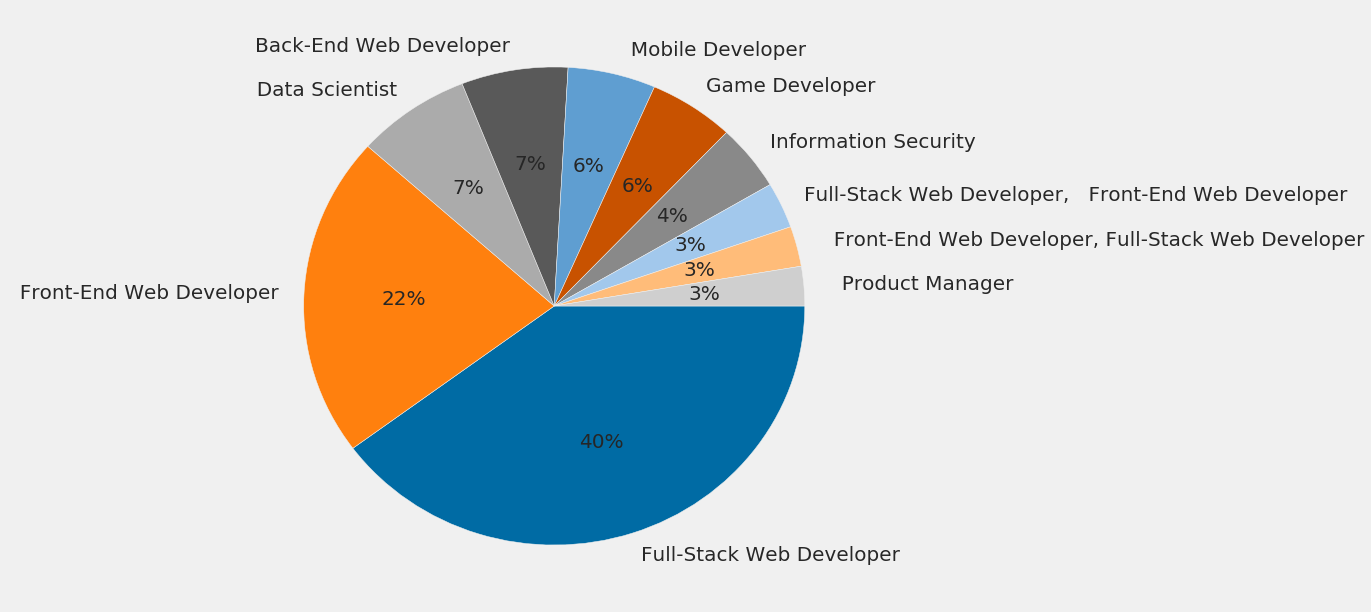

In [5]:
% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")
colorblind = [(0/255,107/255,164/255),(255/255,128/255,14/255),(171/255,171/255,171/255),
              (89/255,89/255,89/255),(95/255,158/255,209/255),(200/255,82/255,0/255),
              (137/255,137/255,137/255),(162/255,200/255,236/255),(255/255,188/255,121/255),
              (207/255,207/255,207/255)]


survey["JobRoleInterest"].value_counts().head(10).plot.pie(label = "", 
                                                           colors = colorblind,
                                                           startangle = 0,
                                                           counterclock = False,
                                                          figsize = (10,10),
                                                          fontsize = 20,
                                                          autopct='%1.0f%%')
plt.show()

According to the above chart, there is a strong interest in **web development.** This means the sample is representative.

## 3.- Locations and Densities of the surveyed.
Use data cleaning to prepare dataframe for frequency analysis.

In [6]:
survey.shape

(18175, 136)

In [7]:
# Drop rows where the surveyed did not specify their Job Role Interest.
survey.dropna(subset = ["JobRoleInterest"], inplace = True)

In [8]:
survey.shape

(6992, 136)

In [9]:
survey["CountryLive"].value_counts()

United States of America         3125
India                             528
United Kingdom                    315
Canada                            260
Poland                            131
Brazil                            129
Germany                           125
Australia                         112
Russia                            102
Ukraine                            89
Nigeria                            84
Spain                              77
France                             75
Romania                            71
Netherlands (Holland, Europe)      65
Italy                              62
Serbia                             52
Philippines                        52
Greece                             46
Ireland                            43
South Africa                       39
Mexico                             37
Turkey                             36
Singapore                          34
Hungary                            34
New Zealand                        33
Croatia     

In [10]:
survey["CountryLive"].value_counts(normalize = True)*100

United States of America         45.700497
India                             7.721556
United Kingdom                    4.606610
Canada                            3.802281
Poland                            1.915765
Brazil                            1.886517
Germany                           1.828020
Australia                         1.637906
Russia                            1.491664
Ukraine                           1.301550
Nigeria                           1.228429
Spain                             1.126060
France                            1.096812
Romania                           1.038315
Netherlands (Holland, Europe)     0.950570
Italy                             0.906698
Serbia                            0.760456
Philippines                       0.760456
Greece                            0.672711
Ireland                           0.628839
South Africa                      0.570342
Mexico                            0.541094
Turkey                            0.526470
Singapore  

There is a better way to display these tables: join them in a dataframe.

In [11]:
absolute_frequency = survey["CountryLive"].value_counts()
relative_frequency = survey["CountryLive"].value_counts(normalize = True)*100

country_frequencies = pd.DataFrame(data = {"Absolute": absolute_frequency, 
                                          "Relative": relative_frequency})

country_frequencies

,Absolute,Relative
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


It would seem that the analysis is complete now, the two "best" markets to advertise in are USA and India but...

## 4.- Spending Money for Learning.
Let's analyze the monetary aspect of learning.

In [12]:
# Change values from 0 to 1 months.
survey["MonthsProgramming"].replace(to_replace = 0, value = 1, inplace = True)

In [13]:
# Create new column to see how much per month the surveyed are considering spending.
survey["MonthlySpending"] = survey["MoneyForLearning"] / survey["MonthsProgramming"]

In [14]:
# See how much null rows exist and drop them in the cell below.
print(survey["MonthlySpending"].isnull().sum())
print(survey.shape)

675
(6992, 137)


In [15]:
survey = survey[survey["MonthlySpending"].notnull()]
survey.shape

(6317, 137)

In [16]:
survey["CountryLive"].isnull().sum()

105

In [17]:
survey = survey[survey["CountryLive"].notnull()]
survey.shape

(6212, 137)

In [18]:
survey["CountryLive"].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [19]:
# Use groupby and mean to create new dataframe.
top_countries = survey.groupby("CountryLive").mean()
top_list = ["United States of America", "India", "United Kingdom", "Canada"]

In [20]:
top_countries["MonthlySpending"][top_list]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: MonthlySpending, dtype: float64

It seems weird to me that India had such a high value. Let's do some visualizations to see what's happening with these distributions.

## 5.- Dealing with Extreme Outliers.
Generate box plots to visualize each country's data.

In [21]:
four_countries = survey[(survey["CountryLive"] == "United States of America") | 
                       (survey["CountryLive"] == "India") |
                       (survey["CountryLive"] == "United Kingdom") |
                       (survey["CountryLive"] == "Canada")]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


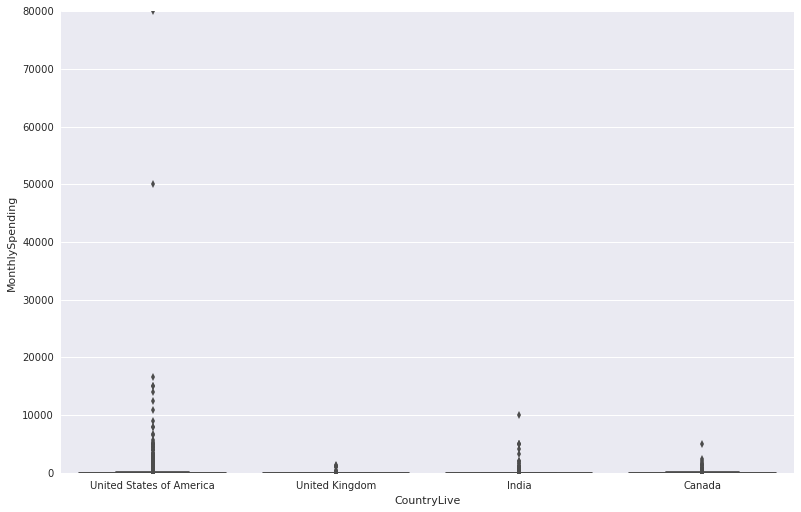

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = "CountryLive", y = "MonthlySpending", data = four_countries)

All cases, except UK, have extreme outliers. I will drop all rows with "MonthlySpending" larger than 1000.

In [23]:
four_countries = four_countries[four_countries["MonthlySpending"] < 1000]

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


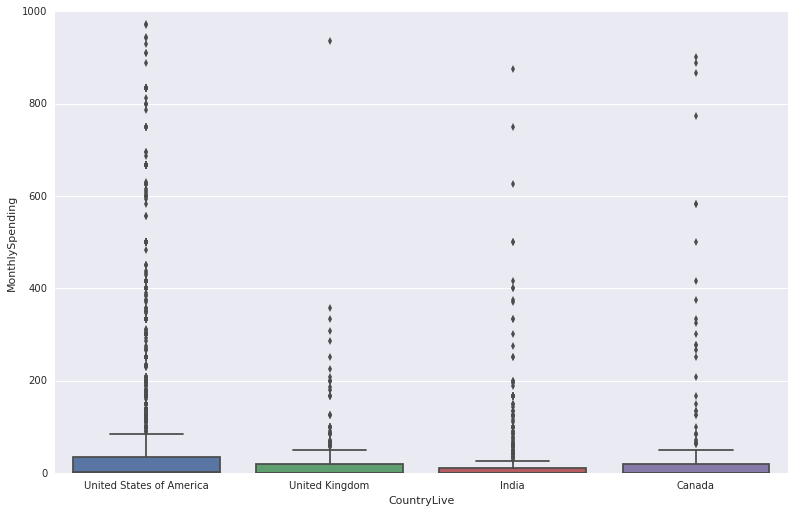

In [24]:
sns.boxplot(x = "CountryLive", y = "MonthlySpending", data = four_countries)

It would seem that dropping everybody above $1000 was the way to go.

In [25]:
best_market = four_countries.groupby("CountryLive").mean()
best_market["MonthlySpending"]

CountryLive
Canada                      46.934471
India                       30.709658
United Kingdom              28.560399
United States of America    55.362155
Name: MonthlySpending, dtype: float64

The two best markets to advertise are: United States and Canada.

## 6.- Choosing the Two Best Markets.
Is there anything else I could be forgetting? Yes, the price for subscription is $60.

In [26]:
best_two_markets = four_countries[four_countries["MonthlySpending"] > 60]

In [27]:
best_two_markets["CountryLive"].value_counts(normalize = True)*100

United States of America    81.055901
India                        8.540373
United Kingdom               5.434783
Canada                       4.968944
Name: CountryLive, dtype: float64

The choise is clear, I recommend investing in USA and India. Also if possible the third choice would be to spend it equally on UK and Canada.

## 7.- Next steps.

* Finding other criteria for choosing the best market.
* Analyzing other data sets:
    * freeCodeCamp's 2016 New Coders Survey
    * Stack Overflow 2018 Developer Survey
* Improve working and style.

To be continued...